## COVID-19 Daily Analysis Table  
  - source:  official data collected by John Hopkins, Stats by Country,  https://github.com/CSSEGISandData/ 
  - worst daily deaths by country evaluating last 7 days
  - charts:  https://dasn.herokuapp.com/covidzoom compare, and https://dasn.herokuapp.com/covid19
  - SUMMARY WARNING ON COUNTRIES BY COVID DAILY DEATH RATES 

In [16]:
try:  ## This table sumarizes the daily deaths by country (calculations below)   %store df9  
    display(df9.transpose().tail(3) )
    print("worst daily deaths by country evaluating last 7 days:")
    display(df9.transpose().tail(9).head(9).mean(axis=0).sort_values(ascending=False).head(7) )
except NameError:
    print("Click Run on this cell only after the RUN ALL completes all calculations")

Country/Region,US,United Kingdom,Brazil,France,Italy,Spain,Germany,Mexico,Sweden,Peru,Russia,Canada,Belgium,Turkey,Netherlands,India
4/28/20,2096,909,480,367,382,301,188,135,81,72,73,83,124,92,48,69
4/29/20,2612,795,430,427,323,453,153,163,107,89,105,79,170,89,145,71
4/30/20,2029,674,493,289,285,268,156,127,124,108,101,97,93,93,84,75


worst daily deaths by country evaluating last 7 days:


Country/Region
US                1990.000000
United Kingdom     727.555556
France             397.777778
Italy              368.777778
Brazil             362.777778
Spain              362.333333
Belgium            177.333333
dtype: float64

### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - source data https://github.com/CSSEGISandData/COVID-19/
  - resources thanks to  http://Jupyter.org  http://MyBinder.org  http://Heroku.com

In [2]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 23.7 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 39.5 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 39.4 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 133 kB/s  eta 0:00:01
     |████████████████████████████████| 12.4 MB 52.0 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 9.8 MB/s  eta 0:00:01
     |████████████████████████████████| 67 kB 4.8 MB/s  eta 0:00:01


In [3]:
 ##JH Source THIS IS THE SOURCE OF ALL CALCULATIONS IN THIS PAGE
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0    922      0 --:--:-- --:--:-- --:--:--   922
100 67769  100 67769    0     0   194k      0 --:--:-- --:--:-- --:--:--  194k


In [4]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [5]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,
US,39753,40945,42659,45086,47412,49724,51493,53755,54881,56259,58355,60967,62996
Italy,23227,23660,24114,24648,25085,25549,25969,26384,26644,26977,27359,27682,27967
United Kingdom,17994,18492,19051,20223,21060,21787,22792,23635,24055,24393,25302,26097,26771
Spain,20043,20453,20852,21282,21717,22157,22524,22902,23190,23521,23822,24275,24543
France,19323,19718,20265,20796,21340,21856,22245,22614,22856,23293,23660,24087,24376
Belgium,5453,5683,5828,5998,6262,6490,6679,6917,7094,7207,7331,7501,7594
Germany,4459,4586,4862,5033,5279,5575,5760,5877,5976,6126,6314,6467,6623
Iran,5031,5118,5209,5297,5391,5481,5574,5650,5710,5806,5877,5957,6028
Brazil,2354,2462,2587,2741,2906,3331,3704,4057,4286,4603,5083,5513,6006


In [6]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [7]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,
US,1192,1714,2427,2326,2312,1769,2262,1126,1378,2096,2612,2029
United Kingdom,498,559,1172,837,727,1005,843,420,338,909,795,674
Brazil,108,125,154,165,425,373,353,229,317,480,430,493
France,395,547,531,544,516,389,369,242,437,367,427,289
Italy,433,454,534,437,464,420,415,260,333,382,323,285
Spain,410,399,430,435,440,367,378,288,331,301,453,268
Germany,127,276,171,246,296,185,117,99,150,188,153,156
Mexico,36,26,145,113,99,152,84,46,83,135,163,127
Sweden,29,40,185,172,84,131,40,2,80,81,107,124


In [8]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
1192,1714,2427,2326,2312,1769,2262,1126,1378,2096,2612,2029"
data-datasets="498,559,1172,837,727,1005,843,420,338,909,795,674"
data-datasets="108,125,154,165,425,373,353,229,317,480,430,493"
data-datasets="395,547,531,544,516,389,369,242,437,367,427,289"
data-datasets="433,454,534,437,464,420,415,260,333,382,323,285"
data-datasets="410,399,430,435,440,367,378,288,331,301,453,268"
data-datasets="127,276,171,246,296,185,117,99,150,188,153,156"
data-datasets="36,26,145,113,99,152,84,46,83,135,163,127"
data-datasets="29,40,185,172,84,131,40,2,80,81,107,124"
data-datasets="52,45,39,46,42,62,66,28,54,72,89,108"
data-datasets="48,44,51,57,42,60,66,66,47,73,105,101"
data-datasets="132,119,105,90,109,97,106,70,84,83,79,97"
data-datasets="230,145,170,264,228,189,238,177,113,124,170,93"
data-datasets="127,123,119,117,115,109,106,99,95,92,89,93"
data-datasets="83,67,165,138,123,112,120,66,43,48,145,84"
data-datasets=

In [9]:
dxy=df0.transpose()
display(dxy.tail(4)) #pivot('Country/Region')

Country/Region,Algeria,Argentina,Austria,Bangladesh,Belgium,Brazil,Canada,Canada,Canada,Chile,...,Serbia,South Africa,Spain,Sweden,Switzerland,Turkey,Ukraine,United Arab Emirates,United Kingdom,US
4/27/20,7,5,7,7,113,317,4,63,84,9,...,0,3,331,80,55,95,11,6,338,1378
4/28/20,5,10,20,3,124,480,2,49,83,9,...,0,3,301,81,34,92,19,7,909,2096
4/29/20,7,7,11,8,170,430,3,81,79,9,...,0,10,453,107,17,89,11,9,795,2612
4/30/20,6,4,4,5,93,493,2,52,97,11,...,54,0,268,124,21,93,11,7,674,2029


In [10]:
#Worst 7 countries in daily deaths last week 
df9.transpose().tail(8).head(7).mean(axis=0).sort_values(ascending=False).head(7)    #1 Average for each row :

Country/Region
US                1936.428571
United Kingdom     719.571429
France             392.428571
Brazil             372.428571
Italy              371.000000
Spain              365.428571
Belgium            177.000000
dtype: float64

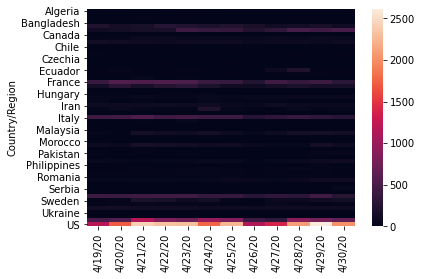

In [11]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

55 11.75


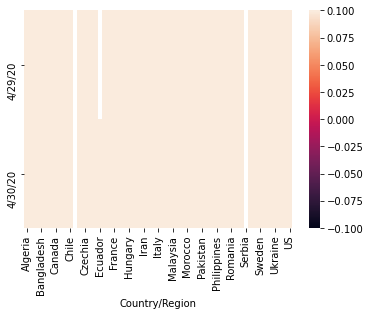

In [12]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [13]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/30/20
Country/Region,
Serbia,10.421053
Pakistan,2.129032
Czechia,1.980000
Peru,1.824885
Malaysia,1.692308
Panama,1.617647
Russia,1.560393
Israel,1.540000
Brazil,1.530192


In [14]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [15]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 64 kB 2.0 MB/s eta 0:00:011
     |████████████████████████████████| 7.1 MB 9.5 MB/s eta 0:00:01     |█████████████▏                  | 2.9 MB 9.5 MB/s eta 0:00:01     |███████████████████▍            | 4.3 MB 9.5 MB/s eta 0:00:01     |████████████████████████▊       | 5.5 MB 9.5 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=d7bfcb580c268e2390ea7a5e299f47a8494073c9cdcaa79d963fe094eb005885
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
